In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #Ëß£ÂÜ≥seaborn‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫ÈóÆÈ¢ò
plt.rc('figure', figsize=(10, 10))  #ÊääpltÈªòËÆ§ÁöÑÂõæÁâásizeË∞ÉÂ§ß‰∏ÄÁÇπ
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # Ëß£ÂÜ≥‰øùÂ≠òÂõæÂÉèÊòØË¥üÂè∑'-'ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò
%matplotlib inline

In [2]:
data = pd.read_csv('livedata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074994 entries, 0 to 1074993
Data columns (total 9 columns):
_id               1074994 non-null object
category_name     1071093 non-null object
room_id           1074994 non-null int64
title             1074994 non-null object
user_id           1074994 non-null int64
user_name         1072123 non-null object
watching_count    1074994 non-null int64
time              1074994 non-null int64
diamonds          245844 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 73.8+ MB


In [4]:
data.sample(5)

_id category_name              room_id  \
588226  ObjectId(5ccbedfc30e692308104ca48)          ÁªùÂú∞Ê±ÇÁîü  6686597334966831885   
953711  ObjectId(5ccfb2fe30e6920187e16132)          Âà∫ÊøÄÊàòÂú∫  6687734477172542220   
853133  ObjectId(5cceb48530e692747aa3555c)          ÁªùÂú∞Ê±ÇÁîü  6687401326768376588   
206362  ObjectId(5cc821ab30e6920470034c5e)          Ëø∑‰Ω†‰∏ñÁïå  6685601769684519694   
146292  ObjectId(5cc7612230e69204700261b8)          Âà∫ÊøÄÊàòÂú∫  6685377137316383496   

                        title       user_id user_name  watching_count  \
588226           ‰∏ÄËßâËµ∑Êù•ÂºÄÂßãÊâæÂõûÂΩìÂπ¥ÁöÑÊàë   51900990808       ÊùéÈüΩÈüΩ             538   
953711         Âà∫ÊøÄÊàòÂú∫ÔºöÂàöÊû™Áéã‰∏éË∑Ø‰∫∫‰∏çÂõûÂ§¥  102541598619      È™öËø™ËÄÅÂ∏à            7168   
853133  ÁªùÂú∞Ê±ÇÁîüÔºö50V50 Áôæ‰∫∫Âõ¢Êàò  Âó®Ëµ∑Êù•~  110965908906    Ty‰∏∂ÈùôÂì•Âì•             358   
206362       Ëø∑‰Ω†‰∏ñÁïåÔºöËêåÊñ∞‰∏ªÊí≠1Ë•øÁìúÂä†Â•ΩÂèã„ÄÇ  108716066485     TyÂ∞èÂÆáÂêñ            8618   
146292       Âà∫ÊøÄÊàòÂú∫ÔºöÁªùÂú∞Èí¢Êû™Áéã ‰∏çÊúçÂ∞±Èí¢Êû™    5756457336     Â≠¶ÂæíÁôΩÂ§ßÂ∏Ö             227   

                 time  diamonds  
588226  1556868490664       NaN  
953711  1557115585099       NaN  
853133  1557050401886       NaN  
206362  1556619590109  457679.0  
146292  1556570375226       NaN

### Êï∞ÊçÆÊ∏ÖÊ¥ó
1. Êï∞ÊçÆÂéªÈáçÔºåÈáçÊñ∞Âª∫Á´ã‰∏ªÈîÆ‚Äúid‚Äù
2. Êää‚Äútime‚ÄùÂ≠óÊÆµËΩ¨Êç¢‰∏∫datetimeÁ±ªÂûã
3. ÈÄâÂèñ2019Âπ¥4Êúà30Êó•0Êó∂Âà∞2019Âπ¥5Êúà7Êó•0Êó∂ÁöÑËÆ∞ÂΩï

#### 1.Êï∞ÊçÆÂéªÈáçÔºåÈáçÊñ∞Âª∫Á´ã‰∏ªÈîÆ‚Äúid‚Äù

In [5]:
data = data[['category_name', 'room_id', 'title', 'user_id', 'user_name',
             'watching_count', 'time', 'diamonds']].drop_duplicates()

In [6]:
data['id'] = list(range(1000000, 2074850))

#### 2. Êää‚Äútime‚ÄùÂ≠óÊÆµËΩ¨Êç¢‰∏∫datetimeÁ±ªÂûã

In [7]:
# data['date_time'] = pd.to_datetime(np.round(data['time']/1000, 0), unit='s', utc=True).dt.tz_convert('Asia/Shanghai')
time_delta = 8*60*60
data['date_time'] = pd.to_datetime(np.round(data['time']/1000 + 28800, 0), unit='s')

In [8]:
data.tail(5)

category_name              room_id                title  \
1074989          ÊÄÄÊóßÁªèÂÖ∏  6687840640782617352       „Äê‰º†Â•á‰πãË∑Ø„ÄëÁáïÂÑøÂ∏¶‰Ω†‰ª¨Âç†Ê≤ôÂüé   
1074990          ÊÄÄÊóßÁªèÂÖ∏  6688089561337236236             ÊÅí‰πÖÈ≠îÂÖΩ‰∏ñÁïåÊñ∞ÂºÄ   
1074991          ÊÄÄÊóßÁªèÂÖ∏  6687627433912601358              ÊàëWÁöÑOÈùíWÊò•   
1074992          ÊÄÄÊóßÁªèÂÖ∏  6686457654125792011  ‰º†Â•áÔºö‰∏âËÅå‰∏öÁâàÊú¨ÁõõÂ§ßÂºÄÂêØ ÁÉ≠Ë°ÄÊ∑∑ÊàòÔºÅÔºÅ   
1074993          ÊÄÄÊóßÁªèÂÖ∏  6688068573782526734             ‰ªäÂ§©Áõ¥Êí≠Â§úÊû´‰∏ìÂú∫   

                  user_id        user_name  watching_count           time  \
1074989      100586443053        178Á•ûÈÄî‰∏ªÊí≠ÁáïÂÑø             130  1557195199009   
1074990       69474743410           ÂØªËßÖ3611             112  1557195199009   
1074991  4155791605773675  Áî®Êà∑1659494487361             114  1557195199009   
1074992  3170612430508708             ‰º†Â•áÊûóÈπø             108  1557195199009   
1074993       96659222836          Âá§Âá∞Âì•Ê∏∏ÊàèËß£ËØ¥             109  1557195199009   

         diamonds       id           date_time  
1074989       NaN  2074845 2019-05-07 10:13:19  
1074990       NaN  2074846 2019-05-07 10:13:19  
1074991       NaN  2074847 2019-05-07 10:13:19  
1074992       NaN  2074848 2019-05-07 10:13:19  
1074993       NaN  2074849 2019-05-07 10:13:19

### 3. ÈÄâÂèñ2019Âπ¥4Êúà30Êó•0Êó∂Âà∞2019Âπ¥5Êúà7Êó•0Êó∂ÁöÑËÆ∞ÂΩï

In [9]:
start_time = pd.to_datetime('2019-04-30 00:00:00')
end_time = pd.to_datetime('2019-05-07 00:00:00')
data = data[(data['date_time']>=start_time) & (data['date_time']<=end_time)]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960932 entries, 86722 to 1047789
Data columns (total 10 columns):
category_name     958137 non-null object
room_id           960932 non-null int64
title             960932 non-null object
user_id           960932 non-null int64
user_name         958460 non-null object
watching_count    960932 non-null int64
time              960932 non-null int64
diamonds          218423 non-null float64
id                960932 non-null int64
date_time         960932 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 80.6+ MB


In [11]:
data.sample(5)

category_name              room_id                title       user_id  \
589155           Âà∫ÊøÄÊàòÂú∫  6686683623280102151            Âà∫ÊøÄÊàòÂú∫ÔºöÂèåÊåáÈòøÁΩ™  100510533949   
346630           ÁÉ≠Èó®ÊâãÊ∏∏  6685996326754323204     „ÄêÈÄÉË∑ëÂêßÂ∞ëÂπ¥„Äë‰ªÄ‰πàÊ†áÈ¢òËÉΩÈ™ó‰Ω†ËøõÊù•   62193996372   
775824           Ëã±ÈõÑËÅîÁõü  6687085826825882381  Ëã±ÈõÑËÅîÁõü:  ‰∏Ä‰∏™Ê≤°ÊúâÊÑüÊÉÖÁöÑÊùÄÊâãÔºÅÔºÅÔºÅ   95597640509   
400483           Á©øË∂äÁÅ´Á∫ø  6686075334254955278       Á©øË∂äÁÅ´Á∫øÔºöÂ∞è‰ªôÂ•≥Â∏¶‰Ω†Êéí‰Ωç‰∏äÂàÜ  105206004942   
1016526          ÊÄÄÊóßÁªèÂÖ∏  6687881593685674764           ÂÖàÊù•Â§ßËà™Êµ∑4Â®ÅÂäõÂä†Âº∫   92950125008   

        user_name  watching_count           time  diamonds       id  \
589155     ‰Ω†ÁöÑÈòøÁΩ™Âì•Âì•            1492  1556868790755       NaN  1589105   
346630     Ê≤ÉÂÖãÂÖâÈò¥ËÄÅÂèã             419  1556705660389       NaN  1346613   
775824     Dae‰∏∂Êô¥Â§©            1233  1556982167853       NaN  1775732   
400483        ‰πÖÂÑø‰∏∂             982  1556728548039     579.0  1400466   
1016526   ÈÇ£‰∏ÄÁû¨ÁöÑÊ∏©Êüî4             193  1557144694049       NaN  2016382   

                  date_time  
589155  2019-05-03 15:33:11  
346630  2019-05-01 18:14:20  
775824  2019-05-04 23:02:48  
400483  2019-05-02 00:35:48  
1016526 2019-05-06 20:11:34

In [12]:
data_steamer = data[['user_id', 'user_name', 'category_name']].drop_duplicates(subset='user_id')
data_steamer.to_csv('steamer.csv', index=False)

In [13]:
data_steamer_info = pd.read_csv('steamerInfo.csv')
data_steamer = data_steamer.merge(data_steamer_info, on='user_id')

### ÈóÆÈ¢òÔºö
‰∏Ä„ÄÅ‰ªé‰∏ªÊí≠ÁöÑËßíÂ∫¶
1. Êî∂ÂÖ•ÊúÄÈ´òÁöÑ‰∏ÄÊâπ‰∏ªÊí≠Ëê•Êî∂Â¶Ç‰ΩïÔºü
2. ÊâÄÊúâ‰∏ªÊí≠ÁöÑËê•Êî∂Áä∂ÂÜµÂ¶Ç‰ΩïÔºü
3. Âπ≥Âè∞ËÅöÈõÜ‰∫ÜÂ§öÂ∞ëÁ≤â‰∏ùË∂ÖËøáÁôæ‰∏áÁöÑ‰∏ªÊí≠Ôºü
4. ‰∏ªÊí≠‰ª¨ÁöÑËæõËã¶Á®ãÂ∫¶Â¶Ç‰ΩïÔºü

‰∫å„ÄÅ‰ªéÂπ≥Âè∞ÁöÑËßíÂ∫¶
4. Âπ≥Âè∞ÁöÑËê•Êî∂Â¶Ç‰ΩïÔºü
5. Âπ≥Âè∞7Â§©ÁöÑËßÇ‰ºó‰∫∫Êï∞Ë∂ãÂäøÂ¶Ç‰ΩïÔºü
6. Âì™Ê¨æÊ∏∏ÊàèÊúÄÂèóÊ¨¢ËøéÔºü
7. Âì™Ê¨æÊ∏∏ÊàèÊúÄÂê∏ÈáëÔºü

‰∏â„ÄÅÁªÜÂåñÂà∞Êüê‰∏Ä‰∏ªÊí≠ÁöÑËßíÂ∫¶
8. ‰∏ªÊí≠‰∏ÄÊôöÁöÑÊâìËµèÁä∂ÂÜµÂ¶Ç‰ΩïÔºü
9. ‰∏ªÊí≠ÁöÑÂºπÂπïËàÜËÆ∫Â¶Ç‰ΩïÔºü

#### 1. Êî∂ÂÖ•ÊúÄÈ´òÁöÑ‰∏ÄÊâπ‰∏ªÊí≠Ëê•Êî∂Â¶Ç‰ΩïÔºü

In [14]:
# ÂéÜÂè≤Ëê•Êî∂Top10
data_income_history = data.groupby('user_id')['diamonds'].max().reset_index(name='history_income')

In [15]:
data_steamer = data_steamer.merge(data_income_history, on='user_id')
data_steamer.head(5)

user_id user_name category_name username  following  follower  \
0  109055578925     ËÅÜÂê¨‰∏∂ÁéâÊôü          Ëã±ÈõÑËÅîÁõü    ËÅÜÂê¨‰∏∂ÁéâÊôü         15     44324   
1   76356861823      Ê∑∑Â≠êzz          Ëã±ÈõÑËÅîÁõü     Ê∑∑Â≠êzz         16     43486   
2   96956845230      ÂÖîÂ≠êËß£ËØ¥          Ëã±ÈõÑËÅîÁõü     ÂÖîÂ≠êËß£ËØ¥         28    133432   
3  104598361016      ÂñµÊ∏∏‰ªôQ          Ëã±ÈõÑËÅîÁõü     ÂñµÊ∏∏‰ªôQ         20     23952   
4   69442746611      ‰∏≠Â®±ÂáâÂøÉ          Ëã±ÈõÑËÅîÁõü     ‰∏≠Â®±ÂáâÂøÉ          1     48281   

                    description          auth  history_income  
0      ÊàëÊòØÂ∞èÂ§™Èò≥ÔºåÊª°Êª°Ê≠£ËÉΩÈáèÔºÅwx:ltys99999    ËÅÜÂê¨‰º†Â™íÂÖ¨Âè∏Á≠æÁ∫¶‰∏ªÊí≠        339489.0  
1         Âì™Êúâ‰ªÄ‰πàÂ≤ÅÊúàÈùôÂ•ΩÔºå‰∏çËøáÊòØÊúâ‰∫∫Êõø‰Ω†Ë¥üÈáçÂâçË°å„ÄÇ  ÈÄÄÂΩπÂÜõ‰∫∫ Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ        243001.0  
2             ÂõΩÊúçÁ¨¨‰∏ÄÊÅ∂È≠îÂ∞è‰∏ëÔºåÁ¨¨‰∫î‰∫∫Ê†ºÂ±†Á•ûÂÖîÂ≠ê     ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ         74474.0  
3  ÊÑüË∞¢Â§ßÂÆ∂Êù•Âà∞‰ªôQÁõ¥Êí≠Èó¥ÔºåÂ∏åÊúõÊú™Êù•ÁöÑË∑Ø‰∏äÔºåÊàë‰ª¨ÈÉΩ‰∫íÁõ∏Èô™‰º¥ÔºÅ           NaN        364761.0  
4        ÊÄßÊÑü‰∏ªÊí≠ÔºåÂú®Á∫øÂºÄÊåÇÁßí‰∫∫ÔºåÁõ¥Êí≠Êó∂Èó¥19ÁÇπÂà∞ÁåùÊ≠ª           NaN        334499.0

In [16]:
data_steamer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 9 columns):
user_id           4601 non-null int64
user_name         4601 non-null object
category_name     4594 non-null object
username          4601 non-null object
following         4601 non-null int64
follower          4601 non-null int64
description       4601 non-null object
auth              1350 non-null object
history_income    3266 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 359.5+ KB


In [17]:
data_steamer['his_income_rmb'] = np.round(data_steamer['history_income']/7, 1)

In [18]:
steamer_income_Top10 = data_steamer.sort_values(by='his_income_rmb', ascending=False).head(10)

In [223]:
from pyecharts import Bar

bar = Bar("ÂéÜÂè≤ÊÄªÊâìËµèÊî∂ÂÖ•Ââç10ÁöÑÊ∏∏Êàè‰∏ªÊí≠", "Êà™Ê≠¢Êó•Êúü:2019Âπ¥5Êúà7Êó•0Êó∂, Âçï‰Ωç:‰∏áÂÖÉ", width=800)
bar.add("", steamer_income_Top10['user_name'].values, 
        np.round(steamer_income_Top10['his_income_rmb'].values/10000, 1), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [20]:
# ÊÄªËê•Êî∂Â§ß‰∫é10‰∏áÁöÑÊ∏∏Êàè‰∏ªÊí≠ÊúâÂ§öÂ∞ë‰∫∫Ôºü
data_steamer[data_steamer['his_income_rmb'] > 100000].shape[0]

177

In [21]:
# 7Â§©Âπ≥ÂùáÊó•Ëê•Êî∂Top10
data_income_7days = np.round((data.groupby('user_id')['diamonds'].max()-
                     data.groupby('user_id')['diamonds'].min())/7/7, 1).reset_index(name='income_7days_rmb')

In [22]:
data_steamer = data_steamer.merge(data_income_7days, on='user_id')
data_steamer.head()

user_id user_name category_name username  following  follower  \
0  109055578925     ËÅÜÂê¨‰∏∂ÁéâÊôü          Ëã±ÈõÑËÅîÁõü    ËÅÜÂê¨‰∏∂ÁéâÊôü         15     44324   
1   76356861823      Ê∑∑Â≠êzz          Ëã±ÈõÑËÅîÁõü     Ê∑∑Â≠êzz         16     43486   
2   96956845230      ÂÖîÂ≠êËß£ËØ¥          Ëã±ÈõÑËÅîÁõü     ÂÖîÂ≠êËß£ËØ¥         28    133432   
3  104598361016      ÂñµÊ∏∏‰ªôQ          Ëã±ÈõÑËÅîÁõü     ÂñµÊ∏∏‰ªôQ         20     23952   
4   69442746611      ‰∏≠Â®±ÂáâÂøÉ          Ëã±ÈõÑËÅîÁõü     ‰∏≠Â®±ÂáâÂøÉ          1     48281   

                    description          auth  history_income  his_income_rmb  \
0      ÊàëÊòØÂ∞èÂ§™Èò≥ÔºåÊª°Êª°Ê≠£ËÉΩÈáèÔºÅwx:ltys99999    ËÅÜÂê¨‰º†Â™íÂÖ¨Âè∏Á≠æÁ∫¶‰∏ªÊí≠        339489.0         48498.4   
1         Âì™Êúâ‰ªÄ‰πàÂ≤ÅÊúàÈùôÂ•ΩÔºå‰∏çËøáÊòØÊúâ‰∫∫Êõø‰Ω†Ë¥üÈáçÂâçË°å„ÄÇ  ÈÄÄÂΩπÂÜõ‰∫∫ Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ        243001.0         34714.4   
2             ÂõΩÊúçÁ¨¨‰∏ÄÊÅ∂È≠îÂ∞è‰∏ëÔºåÁ¨¨‰∫î‰∫∫Ê†ºÂ±†Á•ûÂÖîÂ≠ê     ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ         74474.0         10639.1   
3  ÊÑüË∞¢Â§ßÂÆ∂Êù•Âà∞‰ªôQÁõ¥Êí≠Èó¥ÔºåÂ∏åÊúõÊú™Êù•ÁöÑË∑Ø‰∏äÔºåÊàë‰ª¨ÈÉΩ‰∫íÁõ∏Èô™‰º¥ÔºÅ           NaN        364761.0         52108.7   
4        ÊÄßÊÑü‰∏ªÊí≠ÔºåÂú®Á∫øÂºÄÊåÇÁßí‰∫∫ÔºåÁõ¥Êí≠Êó∂Èó¥19ÁÇπÂà∞ÁåùÊ≠ª           NaN        334499.0         47785.6   

   income_7days_rmb  
0             830.1  
1             163.8  
2              72.4  
3             290.2  
4              79.5

In [23]:
steamer_income_1day_Top10 = data_steamer.sort_values(by='income_7days_rmb', ascending=False).head(10)

In [227]:
np.round(steamer_income_1day_Top10['income_7days_rmb'].values/10000, 1)[1:].mean()

1.0666666666666667

In [224]:
bar = Bar("ÂçïÊó•Âπ≥ÂùáÊâìËµèÊî∂ÂÖ•Ââç10ÁöÑÊ∏∏Êàè‰∏ªÊí≠", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•0Êó∂Ëá≥5Êúà7Êó•0Êó∂, Âçï‰Ωç:‰∏áÂÖÉ", width=800)
bar.add("", steamer_income_1day_Top10['user_name'].values, 
        np.round(steamer_income_1day_Top10['income_7days_rmb'].values/10000, 1), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 2. ÊâÄÊúâ‰∏ªÊí≠ÁöÑËê•Êî∂Áä∂ÂÜµÂ¶Ç‰ΩïÔºü

In [228]:
labels = ['‰∏ÄÁôæÂÖÉ‰ª•ÂÜÖ', '‰∏ÄÁôæÂà∞‰∏ÄÂçÉÂÖÉ', '‰∏ÄÂçÉÂà∞‰∏Ä‰∏áÂÖÉ', '‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ', 
          'ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏áÂÖÉ', '‰∏ÄÁôæ‰∏áÂÖÉÂà∞‰∏ÄÂçÉ‰∏áÂÖÉ', '‰∏ÄÂçÉ‰∏áÂÖÉ‰ª•‰∏ä']
cut_intervals = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [26]:
data_steamer['income_bin'] = pd.cut(data_steamer['his_income_rmb'], cut_intervals,labels=labels, retbins=True, right=False)[0]

In [27]:
income_status = data_steamer['income_bin'].value_counts()
income_status

‰∏ÄÁôæÂÖÉ‰ª•ÂÜÖ        1143
‰∏ÄÂçÉÂà∞‰∏Ä‰∏áÂÖÉ        787
‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ        598
‰∏ÄÁôæÂà∞‰∏ÄÂçÉÂÖÉ        561
ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏áÂÖÉ       167
‰∏ÄÁôæ‰∏áÂÖÉÂà∞‰∏ÄÂçÉ‰∏áÂÖÉ       9
‰∏ÄÂçÉ‰∏áÂÖÉ‰ª•‰∏ä          1
Name: income_bin, dtype: int64

In [28]:
income_status.sum()

3266

In [230]:
data_steamer.shape[0]

4601

In [231]:
4601-3266

1335

In [232]:
income_status/income_status.sum()

‰∏ÄÁôæÂÖÉ‰ª•ÂÜÖ        0.349969
‰∏ÄÂçÉÂà∞‰∏Ä‰∏áÂÖÉ       0.240968
‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ       0.183099
‰∏ÄÁôæÂà∞‰∏ÄÂçÉÂÖÉ       0.171770
ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏áÂÖÉ      0.051133
‰∏ÄÁôæ‰∏áÂÖÉÂà∞‰∏ÄÂçÉ‰∏áÂÖÉ    0.002756
‰∏ÄÂçÉ‰∏áÂÖÉ‰ª•‰∏ä       0.000306
Name: income_bin, dtype: float64

In [233]:
1143+561+787

2491

In [234]:
2491/3266

0.7627066748315983

In [235]:
177/3226

0.05486670799752015

In [229]:
from pyecharts import Line, Overlap

bar = Bar("Ê∏∏Êàè‰∏ªÊí≠ÊâìËµèÊî∂ÂÖ•Áä∂ÂÜµ‰∫∫Êï∞ÂàÜÂ∏ÉÂõæ", "Êà™Ê≠¢Êó•Êúü:2019Âπ¥5Êúà7Êó•0Êó∂, ‰∏ªÊí≠Êï∞:3266, Âçï‰Ωç:‰∫∫", width=600)
bar.add("", labels, [1143, 561, 787, 598, 167, 9, 1],
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", labels, np.array([1143, 561, 787, 598, 167, 9, 1])+10)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 3. Âπ≥Âè∞ËÅöÈõÜ‰∫ÜÂ§öÂ∞ëÁ≤â‰∏ùË∂ÖËøáÁôæ‰∏áÁöÑ‰∏ªÊí≠Ôºü

In [247]:
steamer_info = pd.read_csv('steamerInfo.csv')
steamer_info.sample(5)

million_follower = steamer_info[steamer_info['follower']>1000000]
print('Âπ≥Âè∞ËÅöÈõÜ‰∫Ü{}‰∏™Á≤â‰∏ùÊï∞Ë∂ÖÁôæ‰∏áÁöÑ‰∏ªÊí≠ÔºÅ'.format(million_follower.shape[0]))

Âπ≥Âè∞ËÅöÈõÜ‰∫Ü56‰∏™Á≤â‰∏ùÊï∞Ë∂ÖÁôæ‰∏áÁöÑ‰∏ªÊí≠ÔºÅ


In [117]:
steamer_info.loc[steamer_info['follower']>100000, 'auth'].shape[0]

277

In [115]:
steamer_info.loc[steamer_info['follower']>100000, 'auth'].notnull().sum()

252

In [249]:
auth = steamer_info.iloc[list(steamer_info['follower'].nlargest(200).index)]['auth'].value_counts()

In [252]:
auth[auth.index.str.contains('Ê∏∏ÊàèËææ‰∫∫Âõ¢')]

Ê∏∏ÊàèËææ‰∫∫Âõ¢ÊàêÂëò ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ           28
Ê∏∏ÊàèËææ‰∫∫Âõ¢ÊàêÂëò Áü•ÂêçÊ∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ           25
Ê∏∏ÊàèËææ‰∫∫Âõ¢ÊàêÂëò ‰∏ªÊú∫ÂçïÊú∫‰∏ªÊí≠ ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ     1
Ê∏∏ÊàèËææ‰∫∫Âõ¢ÊàêÂëò Ëø∑‰Ω†‰∏ñÁïå‰∏ªÊí≠ ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ     1
Name: auth, dtype: int64

In [105]:
labels = ['‰∏ÄÁôæ‰ª•ÂÜÖ', '‰∏ÄÁôæÂà∞‰∏ÄÂçÉ', '‰∏ÄÂçÉÂà∞‰∏Ä‰∏á', '‰∏Ä‰∏áÂà∞ÂçÅ‰∏á', 
          'ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏á', '‰∏ÄÁôæ‰∏á‰ª•‰∏ä']
cut_intervals = [0, 100, 1000, 10000, 100000, 1000000, 10000000]

In [106]:
steamer_info.sample()

user_id username  following  follower                    description  \
846  70295810947   Ê©ôÂ∞èÂÖÆÊ±âÊ±Åi          6       663  Âà∫ÊøÄÊàòÂú∫‰∏âÊåáÊìç‰Ωú‚òÖÁãôÂáªÊâãÊ©ôÂ∞èÂÖÆ Ë•øÁìúÊñ∞‰∏ªÊí≠Â∞èÊîπÊîπÔΩû‰∏é‰∏ñÊó†‰∫â   

    auth  
846  NaN

In [107]:
steamer_info['follower_bin'] = pd.cut(steamer_info['follower'], cut_intervals,labels=labels, retbins=True, right=False)[0]

In [108]:
steamer_info['follower_bin'].value_counts()

‰∏ÄÁôæ‰ª•ÂÜÖ      1536
‰∏ÄÂçÉÂà∞‰∏Ä‰∏á     1145
‰∏ÄÁôæÂà∞‰∏ÄÂçÉ     1075
‰∏Ä‰∏áÂà∞ÂçÅ‰∏á      568
ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏á     221
‰∏ÄÁôæ‰∏á‰ª•‰∏ä       56
Name: follower_bin, dtype: int64

In [112]:
bar = Bar("Ê∏∏Êàè‰∏ªÊí≠Á≤â‰∏ùÊï∞ÂàÜÂ∏ÉÂõæ", "Êà™Ê≠¢Êó•Êúü:2019Âπ¥5Êúà7Êó•0Êó∂, Âçï‰Ωç:‰∫∫", width=600)
bar.add("", labels, [1536, 1075, 1145, 568, 221, 56],
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", labels, np.array([1536, 1075, 1145, 568, 221, 56])+20)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 4. ‰∏ªÊí≠‰ª¨ÁöÑËæõËã¶Á®ãÂ∫¶Â¶Ç‰ΩïÔºü

In [32]:
def get_interval(time_data):
    return time_data.sort_values().diff()[-(time_data.sort_values().diff() > pd.Timedelta('0 days 01:00:00'))].sum()

In [33]:
interval = data.groupby('user_id')['date_time'].apply(get_interval).reset_index(name='interval')

In [34]:
data_steamer = data_steamer.merge(interval, on='user_id')
data_steamer.head(5)

user_id user_name category_name username  following  follower  \
0  109055578925     ËÅÜÂê¨‰∏∂ÁéâÊôü          Ëã±ÈõÑËÅîÁõü    ËÅÜÂê¨‰∏∂ÁéâÊôü         15     44324   
1   76356861823      Ê∑∑Â≠êzz          Ëã±ÈõÑËÅîÁõü     Ê∑∑Â≠êzz         16     43486   
2   96956845230      ÂÖîÂ≠êËß£ËØ¥          Ëã±ÈõÑËÅîÁõü     ÂÖîÂ≠êËß£ËØ¥         28    133432   
3  104598361016      ÂñµÊ∏∏‰ªôQ          Ëã±ÈõÑËÅîÁõü     ÂñµÊ∏∏‰ªôQ         20     23952   
4   69442746611      ‰∏≠Â®±ÂáâÂøÉ          Ëã±ÈõÑËÅîÁõü     ‰∏≠Â®±ÂáâÂøÉ          1     48281   

                    description          auth  history_income  his_income_rmb  \
0      ÊàëÊòØÂ∞èÂ§™Èò≥ÔºåÊª°Êª°Ê≠£ËÉΩÈáèÔºÅwx:ltys99999    ËÅÜÂê¨‰º†Â™íÂÖ¨Âè∏Á≠æÁ∫¶‰∏ªÊí≠        339489.0         48498.4   
1         Âì™Êúâ‰ªÄ‰πàÂ≤ÅÊúàÈùôÂ•ΩÔºå‰∏çËøáÊòØÊúâ‰∫∫Êõø‰Ω†Ë¥üÈáçÂâçË°å„ÄÇ  ÈÄÄÂΩπÂÜõ‰∫∫ Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ        243001.0         34714.4   
2             ÂõΩÊúçÁ¨¨‰∏ÄÊÅ∂È≠îÂ∞è‰∏ëÔºåÁ¨¨‰∫î‰∫∫Ê†ºÂ±†Á•ûÂÖîÂ≠ê     ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ         74474.0         10639.1   
3  ÊÑüË∞¢Â§ßÂÆ∂Êù•Âà∞‰ªôQÁõ¥Êí≠Èó¥ÔºåÂ∏åÊúõÊú™Êù•ÁöÑË∑Ø‰∏äÔºåÊàë‰ª¨ÈÉΩ‰∫íÁõ∏Èô™‰º¥ÔºÅ           NaN        364761.0         52108.7   
4        ÊÄßÊÑü‰∏ªÊí≠ÔºåÂú®Á∫øÂºÄÊåÇÁßí‰∫∫ÔºåÁõ¥Êí≠Êó∂Èó¥19ÁÇπÂà∞ÁåùÊ≠ª           NaN        334499.0         47785.6   

   income_7days_rmb income_bin        interval  
0             830.1     ‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ 1 days 06:54:02  
1             163.8     ‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ 2 days 01:02:07  
2              72.4     ‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ 2 days 21:26:00  
3             290.2     ‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ 1 days 05:00:28  
4              79.5     ‰∏Ä‰∏áÂà∞ÂçÅ‰∏áÂÖÉ 1 days 04:45:48

In [35]:
def get_hour_1day(itv):
    days = itv.days
    hours = itv.seconds/3600
    return np.round((days*24 + hours)/7, 1)

In [36]:
data_steamer['hour_per_day'] = data_steamer['interval'].apply(get_hour_1day)

In [37]:
Top10_income_hour = data_steamer.loc[data_steamer['user_name'].isin(steamer_income_1day_Top10['user_name'].values), 
                                    ['user_name', 'hour_per_day', 'income_7days_rmb']].sort_values(by='income_7days_rmb', ascending=False)

In [38]:
Top10_income_hour

user_name  hour_per_day  income_7days_rmb
934       DaeÂ∞èÂ∑ù           8.0          145187.6
3556    Â∞èÁ´πËÄÅÂ∏àskr           3.1           22703.5
1635       È∫¶ÂÖúËß£ËØ¥          10.3           12340.2
1714  Ê±§Á±≥Teacher           4.4           12278.5
278      AÊâ¨Ê∏∏ÊàèÂ§ßÁ•û           8.9            9176.1
2150     ÁæΩÊØõ‰∏çÈ£òÊâçÊÄ™           5.2            8970.6
1322  Âà∫ÊøÄÊàòÂú∫DaeË∑ØÁôΩ           6.1            8893.7
276          ÈùíÊüö           6.3            8732.5
1054  Âà∫ÊøÄÊàòÂú∫DaeÈòøÂ∏É           7.2            6856.6
1074   Ê≠£ÁªèÁöÑÈÖíËÇâÁæé‰∫∫Âë¶           6.3            6450.2

In [239]:
bar = Bar("ÂçïÊó•Âπ≥ÂùáÊâìËµèÊî∂ÂÖ•Ââç10ÁöÑÊ∏∏Êàè‰∏ªÊí≠Êó•Âπ≥ÂùáÁõ¥Êí≠Êó∂Èïø", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•0Êó∂Ëá≥5Êúà7Êó•0Êó∂, Âçï‰Ωç:Â∞èÊó∂", width=800)
bar.add("", Top10_income_hour['user_name'].values, 
        Top10_income_hour['hour_per_day'].values, 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [40]:
Top10_his_income_hour = data_steamer.loc[data_steamer['user_name'].isin(steamer_income_Top10['user_name'].values), 
                                    ['user_name', 'hour_per_day', 'his_income_rmb']].sort_values(by='his_income_rmb', ascending=False)

In [41]:
Top10_his_income_hour

user_name  hour_per_day  his_income_rmb
1934    ÈôàÂ§ßÁôΩÊ∏∏ÊàèËß£ËØ¥           4.3      12802891.6
273      Â§ßÂ•áÊ∏∏ÊàèËß£ËØ¥           7.9       5445611.4
1054  Âà∫ÊøÄÊàòÂú∫DaeÈòøÂ∏É           7.2       5210848.1
1714  Ê±§Á±≥Teacher           4.4       3649125.6
2023      Ê≠£ÁªèÁöÑÊ±üÂèî           4.8       3634273.4
276          ÈùíÊüö           6.3       2878809.3
274        ‰πùÈÖ±Êâ¨Â≠ê           7.5       1981715.6
537        syÂ§©ÂøÉ           2.3       1184297.7
3423    ‰∏âÂß®Â§™Ê∏∏ÊàèËßÜÈ¢ë           2.5       1150586.1
934       DaeÂ∞èÂ∑ù           8.0       1016313.1

In [42]:
bar = Bar("ÂéÜÂè≤ÊÄªËê•Êî∂Ââç10ÁöÑÊ∏∏Êàè‰∏ªÊí≠Êó•Âπ≥ÂùáÁõ¥Êí≠Êó∂Èïø", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•0Êó∂Ëá≥5Êúà7Êó•0Êó∂, Âçï‰Ωç:Â∞èÊó∂", width=800)
bar.add("", Top10_his_income_hour['user_name'].values, 
        Top10_his_income_hour['hour_per_day'].values, 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [43]:
data_steamer.loc[data_steamer['income_7days_rmb'] >=2000, 'hour_per_day'].shape

(51,)

In [44]:
data_steamer.loc[data_steamer['income_7days_rmb'] >=2000, 'hour_per_day'].mean()

6.347058823529411

Êó•Âπ≥ÂùáÊî∂ÂÖ•2000ÂÖÉ‰ª•‰∏äÁöÑ‰∏ªÊí≠Ôºà‰πüÊòØÊúàËê•Êî∂6‰∏áÔºâÔºåÊó•Âπ≥ÂùáÁõ¥Êí≠Êó∂ÈïøÊòØ6.34Â∞èÊó∂„ÄÇ

In [241]:
income_bin_hour = np.round(data_steamer.groupby('income_bin')['hour_per_day'].mean(),1)

In [246]:
bar = Bar("ÂêÑÊî∂ÂÖ•Âå∫Èó¥ÁöÑÊ∏∏Êàè‰∏ªÊí≠Êó•Âπ≥ÂùáÁõ¥Êí≠Êó∂Èïø", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•0Êó∂Ëá≥5Êúà7Êó•0Êó∂, Âçï‰Ωç:Â∞èÊó∂", width=600)
bar.add("", income_bin_hour.index, income_bin_hour.values,
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", income_bin_hour.index, income_bin_hour.values+0.1)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 5. Âπ≥Âè∞ÁöÑËê•Êî∂Â¶Ç‰ΩïÔºü

In [45]:
data_steamer.sample()

user_id  user_name category_name   username  following  follower  \
3016  51729908755  ÂçÉÂπ¥ÁöÑÁéãÂÖ´‰∏áÂπ¥ÁöÑÈæü          Á©øË∂äÁÅ´Á∫ø  ÂçÉÂπ¥ÁöÑÁéãÂÖ´‰∏áÂπ¥ÁöÑÈæü         59   1227026   

                         description               auth  history_income  \
3016  ÂπΩÈªò‰∏é‰∏ì‰∏öÂπ∂Â≠òÔºåÂÅö‰∏Ä‰ΩçÊúâÊÄÅÂ∫¶ÁöÑÊ∏∏ÊàèËß£ËØ¥„ÄÇ È∫ªÊú®ÔºåÊ≥∑ÊàòÁöÑÂ•ΩÂü∫Âèã  Ê∏∏ÊàèËææ‰∫∫Âõ¢ÊàêÂëò ‰ºòË¥®Ê∏∏ÊàèÈ¢ÜÂüüÂàõ‰ΩúËÄÖ       1672732.0   

      his_income_rmb  income_7days_rmb income_bin interval  hour_per_day  
3016        238961.7             312.9    ÂçÅ‰∏áÂà∞‰∏ÄÁôæ‰∏áÂÖÉ 09:14:35           1.3

In [46]:
# ÂéÜÂè≤ÊâìËµèÊÄªËê•Êî∂
data_steamer['his_income_rmb'].sum()

110129953.4

In [47]:
# ‰∏ÉÂ§©ÊÄªËê•Êî∂
data_steamer['income_7days_rmb'].sum()*7

4913348.299999999

In [253]:
4913348/7*365/1000000

256.19600285714284

In [48]:
data['date'] = data['date_time'].dt.date

In [49]:
# ËøôÈáåÂ§™Èïø‰∫ÜÔºåÈúÄË¶ÅËß£Èáä‰∏Ä‰∏ãÔºöÊ†πÊçÆÊó•ÊúüÂíåuser_idÂàÜÁªÑÔºåÊ±ÇÂá∫ÊØèÂ§©ÊØè‰∏™‰∏ªÊí≠ÁöÑËê•Êî∂ÔºåÂÜç‰ª•Êó•ÊúüÂàÜÁªÑÊ±ÇÊÄªÂíåÔºå
# Èô§‰ª•7Ôºà1ÂùóÈí±=7ÈíªÁü≥ÔºâÔºåÈô§‰ª•10000Ôºà‰ª•‰∏áÂÖÉ‰∏∫Âçï‰ΩçÔºâ
income_per_day = np.round((data.groupby(['date', 'user_id'])['diamonds'].max() - 
                           data.groupby(['date', 'user_id'])['diamonds'].min()).groupby(level=0).sum()/7/10000, 0)

In [50]:
# Âè¶Â§ñÔºåËß£Èáä‰∏Ä‰∏ã‰∏∫‰ªÄ‰πàËøôÈáåÁöÑÊÄªÊï∞Ë∑ü‰∏äÈù¢ÁöÑÊÄªËê•Êî∂ÂØπ‰∏ç‰∏äÔºö
# Âõ†‰∏∫Ë•øÁìúËßÜÈ¢ëÊï∞ÊçÆÁöÑËøîÂõûÊú∫Âà∂ÔºåÊØè‰Ωç‰∏ªÊí≠ÊØè‰∏™Êó∂Èó¥ÈááÈõÜÁÇπÁöÑÈíªÁü≥Êï∞ÈááÈõÜÊòØÈöèÊú∫ÁöÑÔºåÊúâÊó∂ÂÄôÂèØ‰ª•ÈááÈõÜÂà∞ÔºåÊúâÊó∂ÂÄô‰∏çËÉΩ
# ÊâÄ‰ª•ÈÄ†Êàê‰∫ÜÈíªÁü≥Êï∞ÁöÑ‰∏çËøûÁª≠ÊÄßÔºåÂØºËá¥Êàë‰ª¨Âè™ËÉΩÂæóÂà∞Â§ßËá¥ÁöÑÊï∞ÊçÆÔºà‰Ωé‰∫éÂÆûÈôÖÁöÑÔºå‰ΩÜÊòØÂ∑Æ‰∏çÂ§™ËøúÔºâ
# ËøôÈáåÊåâÁÖßÊó•ÊúüÂàÜÁªÑ‰πãÂêéÔºåÂèà‰ºöÁº©Áü≠ÂèØ‰ª•ÁªüËÆ°ÁöÑÊó∂Èó¥ÔºåÊâÄ‰ª•Ë∑ü‰∏äÈù¢ÁöÑÊÄªËê•Êî∂ÂØπ‰∏ç‰∏ä
income_per_day.sum()

468.0

In [51]:
# Êàë‰ª¨ÊääÁº∫‰∫ÜÁöÑ23‰∏áËøõË°åÂπ≥ÂùáË°•Ë∂≥
add_num = round((491-468)/7, 0)

In [52]:
bar = Bar("Ë•øÁìúËßÜÈ¢ëÊ∏∏ÊàèÁõ¥Êí≠Âπ≥Âè∞Êó•ÊâìËµèËê•Êî∂", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•Ëá≥5Êúà6Êó•, Âçï‰Ωç:‰∏áÂÖÉ", width=600)
bar.add("", income_per_day.index, income_per_day.values+add_num,
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", income_per_day.index, income_per_day.values+add_num+3)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 6. Âπ≥Âè∞7Â§©ÁöÑËßÇ‰ºó‰∫∫Êï∞Ë∂ãÂäøÂ¶Ç‰ΩïÔºü

In [53]:
watching_count = data.groupby('date_time')['watching_count'].sum()
watching_count = watching_count.resample('3600S', label='right').max()
watching_count = watching_count[watching_count.notnull()]

In [54]:
line = Line("Ë•øÁìúËßÜÈ¢ëÊ∏∏ÊàèÁõ¥Êí≠ËßÇÁúã‰∫∫Êï∞", "Êó∂Èó¥:2019Âπ¥4Êúà30Êó•Ëá≥5Êúà6Êó•, Âçï‰Ωç:‰∏á‰∫∫", width=1100)
line.add("", watching_count.index, watching_count/10000, is_smooth=True, 
             legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8)
line

In [55]:
watching_count = data.groupby('date_time')['watching_count'].sum()
watching_count = watching_count.resample('10800S', label='right').max()
watching_count = watching_count[watching_count.notnull()]

In [56]:
watching_count = watching_count.reset_index(name='watching_count')

In [57]:
watching_count['date'] = watching_count['date_time'].dt.date
watching_count['date'] = watching_count['date'].astype(str)
watching_count['date'] = ['2019-04-30'] + list(watching_count['date'])[:-1]

In [58]:
time_str = [str(i)+'Êó∂' for i in range(0, 24, 3)]
time_str

['0Êó∂', '3Êó∂', '6Êó∂', '9Êó∂', '12Êó∂', '15Êó∂', '18Êó∂', '21Êó∂']

In [59]:
line = Line("Ë•øÁìúËßÜÈ¢ëÊ∏∏ÊàèÁõ¥Êí≠Êó•ËßÇÁúã‰∫∫Êï∞(Êó∂Èó¥:4Êúà30Êó•Ëá≥5Êúà6Êó•, Âçï‰Ωç:‰∏á‰∫∫)", width=600, height=400)
for d in watching_count['date'].unique():
    date_data = watching_count[watching_count['date'] == d]
    line.add(d.replace('2019-', ''), time_str, date_data['watching_count'].values/10000, is_smooth=True,
             legend_text_size=15,xaxis_label_textsize=20,
             yaxis_label_textsize=18,legend_top=30)
line

#### 7. Âì™Ê¨æÊ∏∏ÊàèÊúÄÂèóÊ¨¢ËøéÔºü

In [60]:
data.sample()

category_name              room_id              title      user_id  \
890242          Ê£ãÁâåÊ∏∏Êàè  6687489669250370315  ËêåÂ¶πÂ≠êÊñóÂú∞‰∏ª  Â£∞Èü≥ÁîúÁæéÁ≠â‰Ω†Êù•Âõ¥ËßÇ  97108699433   

       user_name  watching_count           time  diamonds       id  \
890242     ÂñµÂñµÊñóÂú∞‰∏ª           16095  1557062105354       NaN  1890099   

                 date_time        date  
890242 2019-05-05 21:15:05  2019-05-05

In [61]:
ppl_game_top10 = data.groupby(['category_name', 'date_time'])['watching_count'].sum().groupby(level=0).mean().nlargest(10)

In [71]:
bar = Bar("ÊúÄÂèóËßÇ‰ºóÊ¨¢ËøéÁöÑÁõ¥Êí≠Ê∏∏Êàè", "Âçï‰Ωç:‰∏á‰∫∫", width=800)
bar.add("", ppl_game_top10.index, 
        np.round(ppl_game_top10.values/10000, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [72]:
ppl_game = data.groupby('category_name')['user_id'].apply(lambda x: len(x.unique())).nlargest(10)

In [74]:
bar = Bar("ÊúÄÂèó‰∏ªÊí≠Ê¨¢ËøéÁöÑÁõ¥Êí≠Ê∏∏Êàè", "Âçï‰Ωç:‰∫∫", width=800)
bar.add("", ppl_game.index, 
        np.round(ppl_game.values, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 8. Âì™Ê¨æÊ∏∏ÊàèÊúÄÂê∏ÈáëÔºü

In [80]:
data_steamer.sample()

user_id user_name category_name  username  following  follower  \
2646  83746283594  ÈæôÂá§ÊÄªÂëàÁ••Ê≠£ËÉΩÈáè          Âà∫ÊøÄÊàòÂú∫  ÈæôÂá§ÊÄªÂëàÁ••Ê≠£ËÉΩÈáè       3422      3719   

                        description auth  history_income  his_income_rmb  \
2646  ‰∏ñÁïåÂ¶ÇÊ≠§Èô©ÊÅ∂Ôºå‰Ω†Ë¶ÅÂÜÖÂøÉÂº∫Â§ßÔºåÁî∑‰∫∫ÁöÑ‰ºé‰ø©Â•≥‰∫∫ÁöÑÈÅìË°åÔºåÊù•ÂìÅËå∂ÔºÅ  NaN          1323.0           189.0   

      income_7days_rmb income_bin interval  hour_per_day  
2646               2.3     ‰∏ÄÁôæÂà∞‰∏ÄÂçÉÂÖÉ 21:27:13           3.1

In [85]:
high_game = data_steamer.groupby('category_name')['his_income_rmb'].sum().nlargest(10)

In [257]:
54130000/high_game.sum()

0.5348195529696587

In [87]:
bar = Bar("ÊúÄÂê∏ÈáëÁöÑÁõ¥Êí≠Ê∏∏Êàè", "Âçï‰Ωç:‰∏áÂÖÉ", width=800)
bar.add("", high_game.index, 
        np.round(high_game.values/10000, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [88]:
low_game = data_steamer.groupby('category_name')['his_income_rmb'].sum().nsmallest(0)

In [90]:
bar = Bar("ÊúÄ‰∏çÂê∏ÈáëÁöÑÁõ¥Êí≠Ê∏∏Êàè", "Âçï‰Ωç:ÂÖÉ", width=800)
bar.add("", low_game.index, 
        np.round(low_game.values, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#34495e'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 9. ‰∏ªÊí≠‰∏ÄÊôöÁöÑÊâìËµèÁä∂ÂÜµÂ¶Ç‰ΩïÔºü

In [131]:
from pymongo import MongoClient
from pandas.io.json import json_normalize

In [132]:
conn = MongoClient(host='127.0.0.1', port=27017)  # ÂÆû‰æãÂåñMongoClient
db = conn.get_database('XiGua')  

col = db.get_collection('laosiji') # ËøûÊé•Âà∞ÈõÜÂêàticket
mon_data = col.find()  # Êü•ËØ¢Ëøô‰∏™ÈõÜÂêà‰∏ãÁöÑÊâÄÊúâËÆ∞ÂΩï

data_lsj = json_normalize([rec for rec in mon_data])

In [133]:
data_lsj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40885 entries, 0 to 40884
Data columns (total 67 columns):
CreateTime                                     40885 non-null object
Method                                         40885 non-null object
Monitor                                        40885 non-null int64
Msg                                            0 non-null float64
Msg.action                                     1293 non-null float64
Msg.content                                    10226 non-null object
Msg.device_id                                  1292 non-null object
Msg.digg_info.describe                         3843 non-null object
Msg.digg_info.digg_count                       3843 non-null float64
Msg.digg_info.digg_type                        3843 non-null float64
Msg.digg_info.duration                         3843 non-null float64
Msg.digg_info.event_time                       3843 non-null float64
Msg.digg_info.is_fake_user                     3843 non-null object
M

In [134]:
data_lsj['Method'].unique()

array(['VideoLivePresentMessage', 'VideoLiveChatMessage',
       'VideoLiveDiggMessage', 'VideoLivePresentEndTipMessage', '',
       'VideoLiveMemberMessage', 'VideoLiveRoomAdMessage',
       'VideoLiveJoinDiscipulusMessage', 'VideoLiveSocialMessage',
       'VideoLiveDanmakuMessage', 'VideoLiveControlMessage'], dtype=object)

In [136]:
data_lsj = data_lsj[['MsgID', 'Method', 'CreateTime', 'Msg.content', 'Msg.present_info.fan_piao',
                    'Msg.present_info.watermelon', 'Msg.user.name']]

In [143]:
data_lsj.sample(5)

MsgID                   Method           CreateTime  \
14201  6680875202568506120  VideoLivePresentMessage        1555513089567   
20854  6680885541006789389     VideoLiveChatMessage  1555514881493181203   
12416  6680876293774478088     VideoLiveChatMessage  1555512728501777280   
6154   6680871113440021255     VideoLiveChatMessage  1555511521944465490   
6754   6680871044494068494  VideoLivePresentMessage        1555511599587   

      Msg.content  Msg.present_info.fan_piao  Msg.present_info.watermelon  \
14201         NaN                  3280738.0                    6136037.0   
20854        ‰∏çË¶ÅÊøÄÂä®                        NaN                          NaN   
12416     üçÑüçÑüçÑüçÑüçÑüíêüíê                        NaN                          NaN   
6154     Âà´ËØ¥‰∫ÜÔºå‰º§Ëá™Â∞ä‰∫Ü                        NaN                          NaN   
6754          NaN                  3277306.0                    6129890.0   

      Msg.user.name  
14201        Â∑¥ÈªéË°óÂ§¥Êµ™Â≠ê  
20854           Êú®Â≠êÁãá  
12416            ËÉ°Âì•  
6154         Â§ßÊñåÂ≠ê410  
6754        ËëâÂ≠êËëâÂ≠êÂè∂Â≠êÂêñ

In [166]:
data_lsj.drop_duplicates(subset='MsgID', inplace=True)

In [167]:
def get_time(t):
    if t > 155551308956700:
        return t/1000000
    else:
        return t

In [168]:
data_lsj['CreateTime'] = data_lsj['CreateTime'].astype(int)
data_lsj['CreateTime'] = data_lsj['CreateTime'].apply(get_time)
data_lsj['date_time'] = pd.to_datetime(np.round(data_lsj['CreateTime']/1000 + 28800, 0), unit='s')

In [169]:
data_lsj['date_time'].nsmallest(2)

13   1970-01-01 08:00:00
0    2019-04-17 22:09:50
Name: date_time, dtype: datetime64[ns]

In [170]:
data_lsj['date_time'].max()

Timestamp('2019-04-18 01:14:06')

In [175]:
data_lsj['date_time'].max() - data_lsj['date_time'].nsmallest(2)[0]

Timedelta('0 days 03:04:16')

In [171]:
# ‰∏ÄÊôöÁõ¥Êí≠ÁöÑÈíªÁü≥Êï∞
data_lsj['Msg.present_info.fan_piao'].max() - data_lsj['Msg.present_info.fan_piao'].min()

24406.0

In [172]:
# ‰∏ÄÊôöÁõ¥Êí≠ÁöÑÊî∂ÂÖ•
24406.0/7

3486.5714285714284

In [258]:
3486*30

104580

In [173]:
# ‰∏ÄÊôöÁõ¥Êí≠Êî∂Ëé∑ÁöÑË•øÁìúÊï∞
data_lsj['Msg.present_info.watermelon'].max() - data_lsj['Msg.present_info.watermelon'].min()

31676.0

In [176]:
# ‰∏ÄÊôöÁõ¥Êí≠ÁöÑÂºπÂπïÊï∞
data_lsj[data_lsj['Msg.content'].notnull()].shape[0]

10226

In [178]:
# ‰∏ÄÁßí‰∏ÄÊù°ËØÑËÆ∫
10226/3/60/60

0.9468518518518518

In [185]:
data_lsj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40885 entries, 0 to 40884
Data columns (total 8 columns):
MsgID                          40885 non-null object
Method                         40885 non-null object
CreateTime                     40885 non-null int64
Msg.content                    10226 non-null object
Msg.present_info.fan_piao      24600 non-null float64
Msg.present_info.watermelon    24600 non-null float64
Msg.user.name                  40812 non-null object
date_time                      40885 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [186]:
fan_piao = data_lsj[(data_lsj['Msg.present_info.fan_piao'].notnull())]

In [197]:
line = Line("Êüê‰∏ªÊí≠ÈíªÁü≥ÊÄªÊï∞Êó∂Èó¥ÂèòÂåñÂõæ", "Êó∂Èó¥:2019Âπ¥4Êúà17Êó•22Êó∂Ëá≥18Êó•01Êó∂, Âçï‰Ωç:‰∏á", width=600)
line.add("", fan_piao['date_time'], 
         fan_piao['Msg.present_info.fan_piao']/10000, is_smooth=True, 
             legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=327)
line

#### 10. ‰∏ªÊí≠ÁöÑÂºπÂπïËàÜËÆ∫Â¶Ç‰ΩïÔºü

In [198]:
from snownlp import SnowNLP


def get_sent_snownlp(data):
    s = SnowNLP(data)
    return s.sentiments

In [208]:
data_lsj_comment = data_lsj[(data_lsj['Msg.content'].notnull())&
                            (data_lsj['Msg.content'] != '')]
data_lsj_comment['sent'] = data_lsj_comment['Msg.content'].apply(get_sent_snownlp)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
data_lsj_comment['sent'].mean()

0.5101700215153961

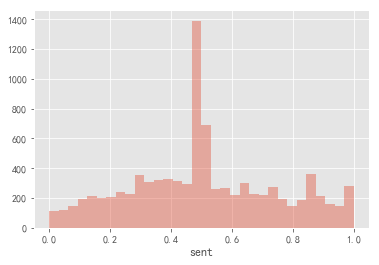

In [217]:
sns.distplot(data_lsj_comment['sent'], kde=False)

In [219]:
# ÂºπÂπïËØÑËÆ∫ÁöÑËØç‰∫ëÂõæ
import jieba
from collections import Counter
from pyecharts import WordCloud


swords = [x.strip() for x in open ('stopwords.txt')]

In [220]:
def plot_word_cloud(data, swords):
    text = ''.join(data)
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [222]:
plot_word_cloud(data_lsj_comment['Msg.content'], swords=swords)